<a href="https://colab.research.google.com/github/hannydm/latihan-pengolahan-citra/blob/main/LinearRegression_Untuk_Kriminalitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Kode ini berguna untuk menampilkan data yang kita miliki.

# **DATASET**

In [ ]:
#dataset pertama
df = pd.read_excel('angka_kriminalitas_2.xls')
df

,Tahun,Kejadian :,Pembunuhan,Penganiayaan Berat,Penculikan,Pencurian dengan Kekerasan,Pencurian dengan Pemberatan,Pencurian Ranmor R2 & R4,Penganiayaan Ringan,Pemerkosaan,...,Jumlah Tindak Kriminal yang terjadi selama 1 tahun,1. Jumlah kasus Narkoba,2. Jumlah kasus Pembunuhan,3. Jumlah Kejahatan Seksual,4. Jumlah kasus Penganiayaan,5. Jumlah kasus Pencurian,6. Jumlah kasus Penipuan,7. Jumlah kasus Pemalsuan uang,Angka Kriminalitas,Angka Kriminalitas Tertangani
0,2016,3820,33,578,5,111,1075,1372,243,21,...,7559,2902,33,231,821,3196,370,6,21,NaN
1,2017,3222,35,471,1,139,844,1068,239,17,...,6189,2486,35,123,710,2574,381,3,17,NaN
2,2018,1364,23,209,2,46,384,258,122,4,...,2660,1582,19,14,296,572,186,5,7,NaN
3,2019,1442,12,185,2,60,381,414,111,18,...,2546,1513,9,32,229,681,112,2,6,NaN
4,2020,626,6,54,1,20,172,148,62,1,...,1087,665,6,4,116,298,98,2,2,NaN


Pada slicing untuk mengecheck column

In [ ]:
df[['Kejadian :', 'Jumlah Tindak Kriminal Yang Tertangani :' ]]

,Kejadian :,Jumlah Tindak Kriminal Yang Tertangani :
0,3820,2230
1,3222,1882
2,1364,1778
3,1442,1113
4,626,476


code ini berguna untuk memberi tahu tipe *data* ditiap kolom

In [ ]:
df.dtypes

Pada df memberi tahu ada berapa baris dan kolom.

In [ ]:
df.shape

(5, 39)

Pada Bagian ini memberitahu semua hal yang berkaitan dengan datayang telah dimasukkan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Tahun                                               5 non-null      int64  
 1   Kejadian :                                          5 non-null      int64  
 2   Pembunuhan                                          5 non-null      int64  
 3   Penganiayaan Berat                                  5 non-null      int64  
 4   Penculikan                                          5 non-null      int64  
 5   Pencurian dengan Kekerasan                          5 non-null      int64  
 6   Pencurian dengan Pemberatan                         5 non-null      int64  
 7   Pencurian Ranmor R2 & R4                            5 non-null      int64  
 8   Penganiayaan Ringan                                 5 non-null      int64  
 9   Pem

code untuk mencari data yg mungkin hilang

In [ ]:
df.isna().sum()

Tahun                                                 0
Kejadian :                                            0
Pembunuhan                                            0
Penganiayaan Berat                                    0
Penculikan                                            0
Pencurian dengan Kekerasan                            0
Pencurian dengan Pemberatan                           0
Pencurian Ranmor R2 & R4                              0
Penganiayaan Ringan                                   0
Pemerkosaan                                           0
Pembakaran                                            0
Senpi/Handak                                          0
Pemerasan                                             0
Penyelundupan                                         0
Kejahatan Terhadap Kekayaan Negara                    0
Jumlah Tindak Kriminal Yang Tertangani :              0
1. Pembunuhan                                         0
2. Penganiayaan Berat                           

Ini menampilkan data kedua,sebgai data pendukung

In [ ]:
#data kedua
df2 = pd.read_excel('penyandang-masalah-kesejahteraan-sosial-dan-sarana-kesejahteraan-sosial-prov.-kaltim-tahun-2016-.xlsx')
df2

,NO,Daftar Data,2016,2017,2018,2019,2020
0,1,Anak Balita Terlantar,2562,2529,2529,2529,2529
1,2,Anak Terlantar,7510,6512,6644,6644,5989
2,3,Anak Yang Berhadapan Dengan Hukum,1416,1395,986,986,986
3,4,Anak Jalanan,1022,1007,517,517,517
4,5,Anak Dengan Kedisabilitasan (ADK),1759,1733,1733,1733,1733
5,6,Anak Korban Tindak Kekerasan,5412,5331,1012,1012,1012
6,7,Anak Yang Memerlukan Perlindungan Khusus,6758,6657,2698,2698,2698
7,9,Penyandang Disabilitas,5647,7744,7893,7893,8358
8,10,Tuna Susila,2084,1208,213,213,213
9,11,Gelandangan,500,493,213,213,213


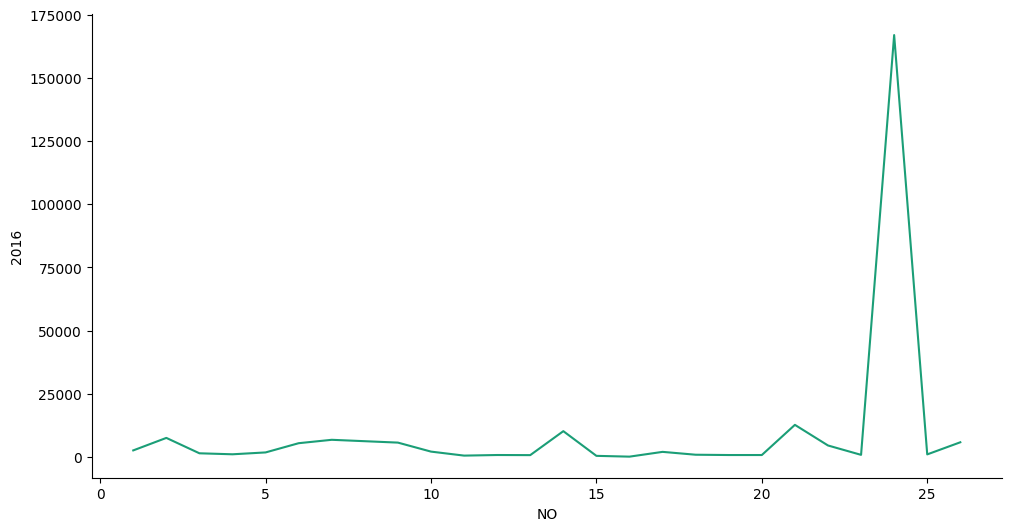

In [ ]:
# @title NO vs 2016

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NO']
  ys = series[2016]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('NO', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NO')
_ = plt.ylabel(2016)

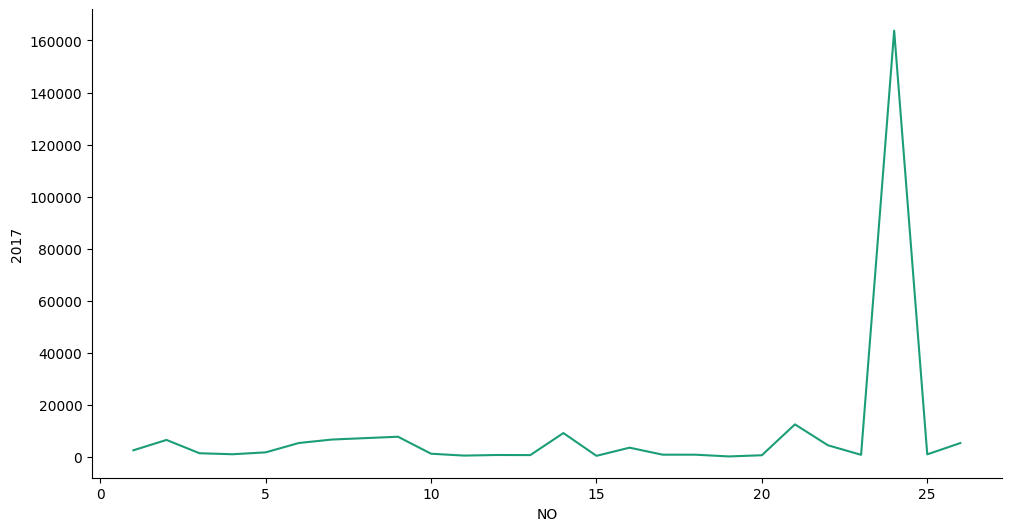

In [ ]:
# @title NO vs 2017

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NO']
  ys = series[2017]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('NO', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NO')
_ = plt.ylabel(2017)

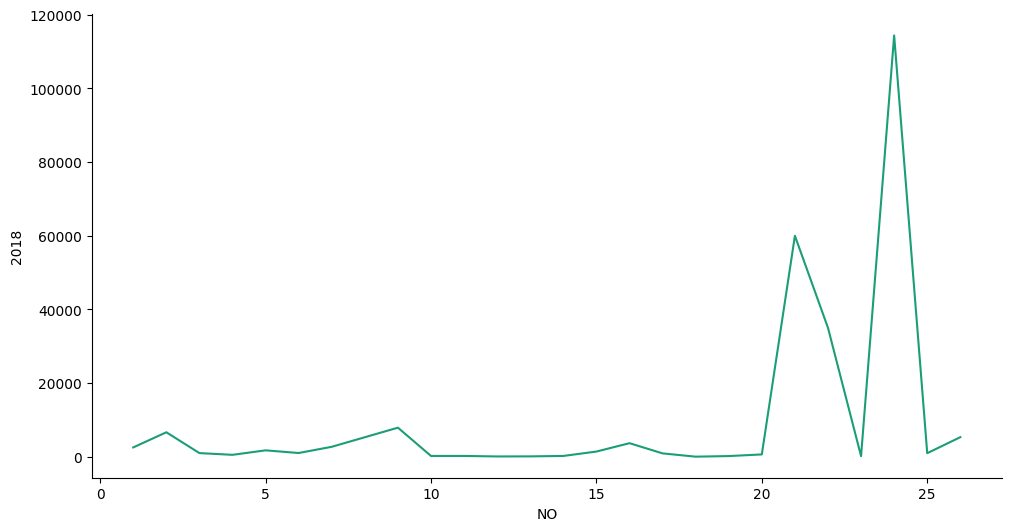

In [ ]:
# @title NO vs 2018

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NO']
  ys = series[2018]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('NO', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NO')
_ = plt.ylabel(2018)

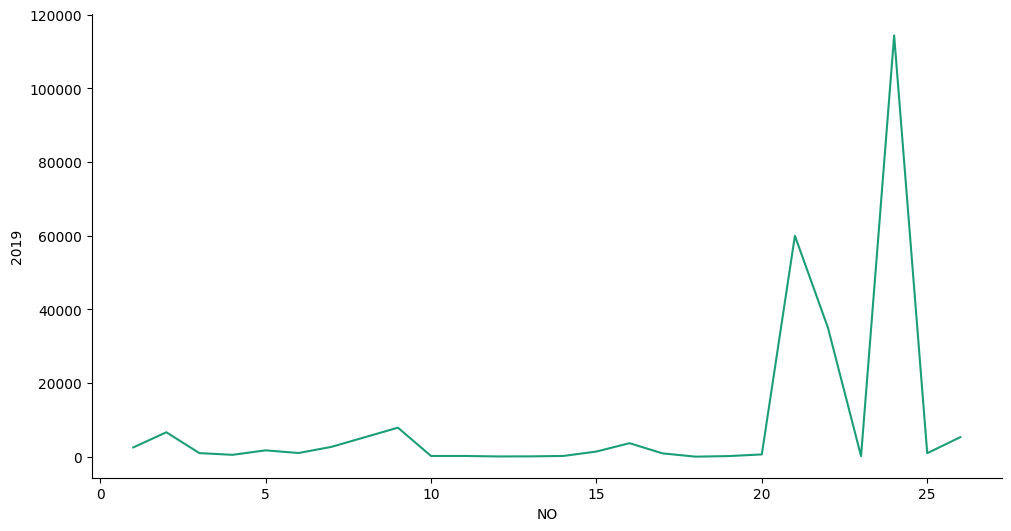

In [ ]:
# @title NO vs 2019

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NO']
  ys = series[2019]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('NO', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NO')
_ = plt.ylabel(2019)

menanmpilkan informasi data ke 2

In [ ]:
df2.dtypes

NO              int64
Daftar Data    object
2016            int64
2017            int64
2018            int64
2019            int64
2020            int64
dtype: object

Pada kolom kali ini df.info() berguna untuk memberikan informasi tentang data yang ada.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NO           25 non-null     int64 
 1   Daftar Data  25 non-null     object
 2   2016         25 non-null     int64 
 3   2017         25 non-null     int64 
 4   2018         25 non-null     int64 
 5   2019         25 non-null     int64 
 6   2020         25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [ ]:
df2.shape

(25, 7)

selanjutnya untuk mencari value  missing, bisa kita lakukan dengan sebagai berikut

In [ ]:
df2.isna().sum()

NO             0
Daftar Data    0
2016           0
2017           0
2018           0
2019           0
2020           0
dtype: int64

# **HISTOGRAM**

In [ ]:
# membuat variable untuk dijadikan plot
# membuat variable dari dataset yang pertama

year_number = df.loc[:, 'Tahun'].values
pembunuhan_number = df.loc[:, 'Pembunuhan'].values
pb_number = df.loc[:, 'Penganiayaan Berat'].values
penculikan_number = df.loc[:, 'Penculikan'].values
pdk_number = df.loc[:, 'Pencurian dengan Kekerasan'].values
pdp_number = df.loc[:, 'Pencurian dengan Pemberatan'].values
pranmor_number = df.loc[:, 'Pencurian Ranmor R2 & R4'].values
pr_number = df.loc[:, 'Penganiayaan Ringan'].values
pemerkosaan_number = df.loc[:, 'Pemerkosaan'].values
pembakaran_number = df.loc[:, 'Pembakaran'].values
senjata_number = df.loc[:, 'Senpi/Handak'].values
pemerasan_number = df.loc[:, 'Pemerasan'].values
penyelundupan_number = df.loc[:, 'Penyelundupan'].values
korupsi_number = df.loc[:, 'Kejahatan Terhadap Kekayaan Negara'].values
year_number

array([2016, 2017, 2018, 2019, 2020])

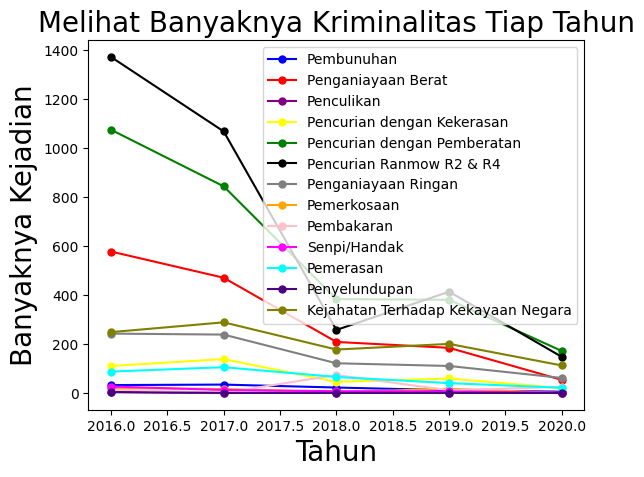

In [ ]:
# plt.style.use('seaborn')
# fig, axes = plt.subplots(nrows = 1, ncols = 1);

plt.plot(year_number, pembunuhan_number, c = 'blue', marker = '.', markersize = 10, label = 'Pembunuhan')
plt.plot(year_number, pb_number, c = 'red', marker = '.', markersize = 10, label = 'Penganiayaan Berat')
plt.plot(year_number, penculikan_number, c = 'purple', marker = '.', markersize = 10, label = 'Penculikan')
plt.plot(year_number, pdk_number, c = 'yellow', marker = '.', markersize = 10, label = 'Pencurian dengan Kekerasan')
plt.plot(year_number, pdp_number, c = 'green', marker = '.', markersize = 10, label ='Pencurian dengan Pemberatan')
plt.plot(year_number, pranmor_number, c = 'black', marker = '.', markersize = 10, label ='Pencurian Ranmow R2 & R4')
plt.plot(year_number, pr_number, c = 'grey', marker = '.', markersize = 10, label = 'Penganiayaan Ringan')
plt.plot(year_number, pemerkosaan_number, c = 'orange', marker = '.', markersize = 10, label = 'Pemerkosaan')
plt.plot(year_number, pembakaran_number, c = 'pink', marker = '.', markersize = 10, label = 'Pembakaran')
plt.plot(year_number, senjata_number, c = 'magenta', marker = '.', markersize = 10, label = 'Senpi/Handak')
plt.plot(year_number, pemerasan_number, c = 'cyan', marker = '.', markersize = 10, label = 'Pemerasan')
plt.plot(year_number, penyelundupan_number, c = 'indigo', marker = '.', markersize = 10, label = 'Penyelundupan')
plt.plot(year_number, korupsi_number, c = 'olive', marker = '.', markersize = 10, label ='Kejahatan Terhadap Kekayaan Negara')

plt.xlabel('Tahun', fontsize = 20)
plt.ylabel('Banyaknya Kejadian', fontsize = 20)
plt.title('Melihat Banyaknya Kriminalitas Tiap Tahun', fontsize = 20)

plt.legend()

# plt.grid() # sama untuk membuat grid cuman dia tidak mempunyai warna background


Dalam analisis data yang kami uji, kami mengamati pola yang menarik dalam tingkat kejahatan. Histogram ini menggambarkan distribusi frekuensi kejahatan berdasarkan jenisnya. Dari data yang kami kumpulkan, terlihat bahwa kejahatan pencurian ranmor memiliki frekuensi tertinggi, diikuti oleh Pencurian dengan pembaratan, seta . Namun, perlu dicatat bahwa kejahatan narkotika menunjukkan peningkatan yang signifikan dalam beberapa bulan terakhir, menyiratkan adanya perubahan dalam dinamika kejahatan di wilayah ini. Analisis lebih lanjut diperlukan untuk memahami faktor-faktor yang mendasari tren ini dan mengembangkan strategi pencegahan yang efektif."








In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Kejadian :', y='Pencurian Ranmor R2 & R4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Kejadian :', y='Pembunuhan', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Pembunuhan.

In [ ]:
from matplotlib import pyplot as plt
df['Pembunuhan'].plot(kind='hist', bins=20, title='Pembunuhan')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Penganiayaan Berat.

In [ ]:
from matplotlib import pyplot as plt
df['Penganiayaan Berat'].plot(kind='hist', bins=20, title='Penganiayaan Berat')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Penculikan.

In [ ]:
from matplotlib import pyplot as plt
df['Penculikan'].plot(kind='hist', bins=20, title='Penculikan')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Pencurian dengan kekerasan.

In [ ]:
from matplotlib import pyplot as plt
df['Pencurian dengan Kekerasan'].plot(kind='hist', bins=20, title='Pencurian dengan Kekerasan')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Pencurian dengan Pemberatan.

In [ ]:
from matplotlib import pyplot as plt
df['Pencurian dengan Pemberatan'].plot(kind='hist', bins=20, title='Pencurian dengan Pemberatan')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Pencurian Ranmor R2 & R4

In [ ]:
from matplotlib import pyplot as plt
df['Pencurian Ranmor R2 & R4'].plot(kind='hist', bins=20, title='Pencurian Ranmor R2 & R4')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Penganiayaan Ringan.

In [ ]:
from matplotlib import pyplot as plt
df['Penganiayaan Ringan'].plot(kind='hist', bins=20, title='Penganiayaan Ringan')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Pemerkosaan.


In [ ]:
from matplotlib import pyplot as plt
df['Pemerkosaan'].plot(kind='hist', bins=20, title='Pemerkosaan')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Pembakaran

In [ ]:
from matplotlib import pyplot as plt
df['Pembakaran'].plot(kind='hist', bins=20, title='Pembakaran')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Senpi/Handak

In [ ]:
from matplotlib import pyplot as plt
df['Senpi/Handak'].plot(kind='hist', bins=20, title='Senpi/Handak')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Pemerasaan.

In [ ]:
from matplotlib import pyplot as plt
df['Pemerasan'].plot(kind='hist', bins=20, title='Pemerasan')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Penyelundupan.

In [ ]:
from matplotlib import pyplot as plt
df['Penyelundupan'].plot(kind='hist', bins=20, title='Penyelundupan')
plt.gca().spines[['top', 'right',]].set_visible(False)

Untuk menampilkan histogram dari kasus Kejahatan Terhadap kekayaan Negara.

In [ ]:
from matplotlib import pyplot as plt
df['Kejahatan Terhadap Kekayaan Negara'].plot(kind='hist', bins=20, title='Kekayaan Terhadap Kekayaan Negara')
plt.gca().spines[['top', 'right',]].set_visible(False)

# FEATURES Y AND FEATURES X


In [ ]:
df.describe()

,Tahun,Kejadian :,Pembunuhan,Penganiayaan Berat,Penculikan,Pencurian dengan Kekerasan,Pencurian dengan Pemberatan,Pencurian Ranmor R2 & R4,Penganiayaan Ringan,Pemerkosaan,...,Jumlah Tindak Kriminal yang terjadi selama 1 tahun,1. Jumlah kasus Narkoba,2. Jumlah kasus Pembunuhan,3. Jumlah Kejahatan Seksual,4. Jumlah kasus Penganiayaan,5. Jumlah kasus Pencurian,6. Jumlah kasus Penipuan,7. Jumlah kasus Pemalsuan uang,Angka Kriminalitas,Angka Kriminalitas Tertangani
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,0.0
mean,2018.000000,2094.800000,21.800000,299.400000,2.200000,75.200000,571.200000,652.000000,155.400000,12.200000,...,4008.200000,1829.600000,20.400000,80.800000,434.400000,1464.200000,229.400000,3.60000,10.600000,NaN
std,1.581139,1356.879213,12.716131,217.108959,1.643168,48.689835,373.769581,537.901478,81.352935,9.038805,...,2731.901847,880.161519,13.334167,96.284474,311.503291,1322.897653,137.552899,1.81659,8.018728,NaN
min,2016.000000,626.000000,6.000000,54.000000,1.000000,20.000000,172.000000,148.000000,62.000000,1.000000,...,1087.000000,665.000000,6.000000,4.000000,116.000000,298.000000,98.000000,2.00000,2.000000,NaN
25%,2017.000000,1364.000000,12.000000,185.000000,1.000000,46.000000,381.000000,258.000000,111.000000,4.000000,...,2546.000000,1513.000000,9.000000,14.000000,229.000000,572.000000,112.000000,2.00000,6.000000,NaN
50%,2018.000000,1442.000000,23.000000,209.000000,2.000000,60.000000,384.000000,414.000000,122.000000,17.000000,...,2660.000000,1582.000000,19.000000,32.000000,296.000000,681.000000,186.000000,3.00000,7.000000,NaN
75%,2019.000000,3222.000000,33.000000,471.000000,2.000000,111.000000,844.000000,1068.000000,239.000000,18.000000,...,6189.000000,2486.000000,33.000000,123.000000,710.000000,2574.000000,370.000000,5.00000,17.000000,NaN
max,2020.000000,3820.000000,35.000000,578.000000,5.000000,139.000000,1075.000000,1372.000000,243.000000,21.000000,...,7559.000000,2902.000000,35.000000,231.000000,821.000000,3196.000000,381.000000,6.00000,21.000000,NaN


In [ ]:
df.isnull().sum()*100/df.shape[0]

Tahun                                                   0.0
Kejadian :                                              0.0
Pembunuhan                                              0.0
Penganiayaan Berat                                      0.0
Penculikan                                              0.0
Pencurian dengan Kekerasan                              0.0
Pencurian dengan Pemberatan                             0.0
Pencurian Ranmor R2 & R4                                0.0
Penganiayaan Ringan                                     0.0
Pemerkosaan                                             0.0
Pembakaran                                              0.0
Senpi/Handak                                            0.0
Pemerasan                                               0.0
Penyelundupan                                           0.0
Kejahatan Terhadap Kekayaan Negara                      0.0
Jumlah Tindak Kriminal Yang Tertangani :                0.0
1. Pembunuhan                           

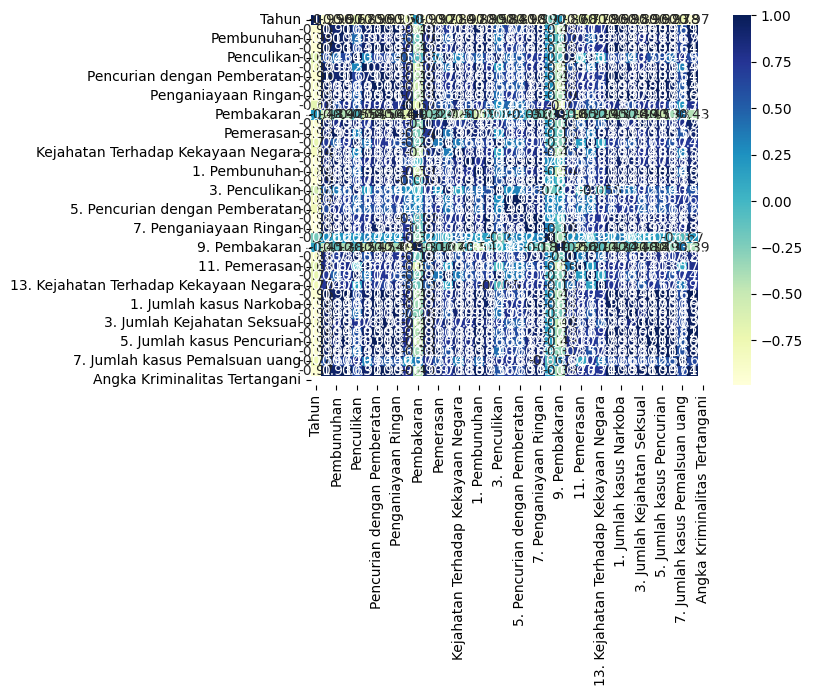

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# MODEL BUILDING

In [ ]:
X = df[['Pencurian Ranmor R2 & R4', 'Pembunuhan', 'Penganiayaan Berat', 'Penculikan', 'Pencurian dengan Kekerasan', 'Pencurian dengan Pemberatan', 'Penganiayaan Ringan', 'Pemerkosaan', 'Pembakaran', 'Senpi/Handak', 'Pemerasan', 'Penyelundupan', 'Kejahatan Terhadap Kekayaan Negara']]
y = df['Jumlah Tindak Kriminal Yang Tertangani :']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

,Pencurian Ranmor R2 & R4,Pembunuhan,Penganiayaan Berat,Penculikan,Pencurian dengan Kekerasan,Pencurian dengan Pemberatan,Penganiayaan Ringan,Pemerkosaan,Pembakaran,Senpi/Handak,Pemerasan,Penyelundupan,Kejahatan Terhadap Kekayaan Negara
3,414,12,185,2,60,381,111,18,12,7,41,1,201
4,148,6,54,1,20,172,62,1,26,2,22,1,113
0,1372,33,578,5,111,1075,243,21,14,27,88,4,249


In [ ]:
y_train.head()

3    1113
4     476
0    2230
Name: Jumlah Tindak Kriminal Yang Tertangani :, dtype: int64

# Building Linear Model

In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

const                                -0.014838
Pencurian Ranmor R2 & R4              0.190719
Pembunuhan                           -0.026537
Penganiayaan Berat                    1.493890
Penculikan                            0.002682
Pencurian dengan Kekerasan            1.384552
Pencurian dengan Pemberatan           0.157521
Penganiayaan Ringan                   0.151698
Pemerkosaan                           0.965093
Pembakaran                           -1.256310
Senpi/Handak                         -0.013126
Pemerasan                             0.148554
Penyelundupan                        -0.057468
Kejahatan Terhadap Kekayaan Negara    2.934509
dtype: float64

In [ ]:
#print(lr.summary())

In [ ]:
#plt.scatter(X_train, y_train)
#plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
#plt.show()

# MODEL EVALUATION

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-17-18430177a6b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


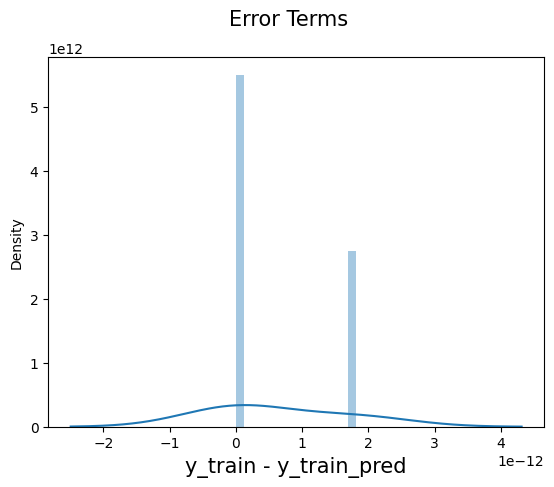

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

# PREDICTION ON A TEST SET

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

1    1849.502379
2     746.430898
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

729.7913769852679

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared = (r_squared + 195)* -1
r_squared

0.9657743794576277

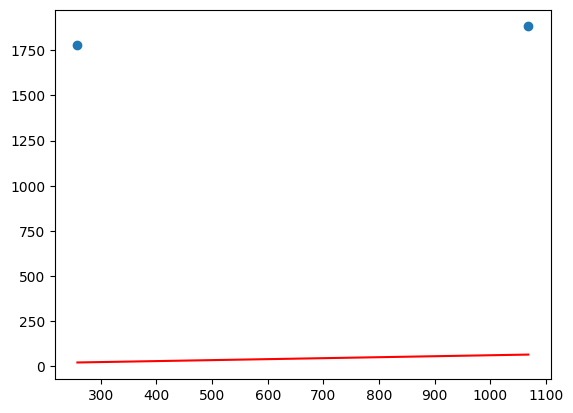

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()